# Mini Project-Heart Disease By US States & Territories

## Noah Modesitt & David Smith

### Data Source

 This data is downloaded from https://catalog.data.gov/dataset/

This data was collected from the year 2014 to express Heart Disease Mortality Rates across the U.S. by state of ages 35+.

The questions we intend to answer are:



Which states/ territories have the highest Heart Disease mortality rates?
Which gender is more likely to suffer mortality from Heart Disease?

In [79]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://minilab/Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County.csv') # load the data from s3
df.tail() #show the top 5 rows

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
59071,2014,TX,Lubbock County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Male,Race/Ethnicity,Asian and Pacific Islander,T2,48303,"(33.613697, -101.820878)"
59072,2014,TX,Mitchell County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Male,Race/Ethnicity,Black,T2,48335,"(32.306972, -100.919542)"
59073,2014,IA,Winnebago County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,19189,"(43.375754, -93.73907)"
59074,2014,WV,Lewis County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,54041,"(38.995666, -80.505332)"
59075,2014,KS,Republic County,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Female,Race/Ethnicity,Asian and Pacific Islander,T2,20157,"(39.82459, -97.646162)"


In [80]:
df.shape

(59076, 19)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59076 entries, 0 to 59075
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        59076 non-null  int64  
 1   LocationAbbr                59076 non-null  object 
 2   LocationDesc                59076 non-null  object 
 3   GeographicLevel             59076 non-null  object 
 4   DataSource                  59076 non-null  object 
 5   Class                       59076 non-null  object 
 6   Topic                       59076 non-null  object 
 7   Data_Value                  32149 non-null  float64
 8   Data_Value_Unit             59076 non-null  object 
 9   Data_Value_Type             59076 non-null  object 
 10  Data_Value_Footnote_Symbol  26927 non-null  object 
 11  Data_Value_Footnote         26927 non-null  object 
 12  StratificationCategory1     59076 non-null  object 
 13  Stratification1             590

In [82]:
df.isnull().sum() #show the number of rows containing null value

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    26927
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    32149
Data_Value_Footnote           32149
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Location 1                       18
dtype: int64

In [83]:
df.describe() #statistical summary of the data

,Year,Data_Value,LocationID
count,59076.0,32149.000000,59076.000000
mean,2014.0,349.306775,30946.267215
std,0.0,140.549773,16728.893538
min,2014.0,6.000000,0.000000
25%,2014.0,253.300000,18137.000000
50%,2014.0,340.000000,29208.000000
75%,2014.0,433.800000,46091.000000
max,2014.0,3000.900000,78030.000000


In [84]:
pip install jupyter-ai~=1.0 # Because I am using JupyterLab V3, I need to use Jupyter-ai V1.0

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install jupyter-ai[all]

Note: you may need to restart the kernel to use updated packages.


In [86]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [87]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [88]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [89]:
%load_ext jupyter_ai_magics

The jupyter_ai_magics extension is already loaded. To reload it, use:
  %reload_ext jupyter_ai_magics


In [90]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [91]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59076 entries, 0 to 59075
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        59076 non-null  int64  
 1   LocationAbbr                59076 non-null  object 
 2   LocationDesc                59076 non-null  object 
 3   GeographicLevel             59076 non-null  object 
 4   DataSource                  59076 non-null  object 
 5   Class                       59076 non-null  object 
 6   Topic                       59076 non-null  object 
 7   Data_Value                  32149 non-null  float64
 8   Data_Value_Unit             59076 non-null  object 
 9   Data_Value_Type             59076 non-null  object 
 10  Data_Value_Footnote_Symbol  26927 non-null  object 
 11  Data_Value_Footnote         26927 non-null  object 
 12  StratificationCategory1     59076 non-null  object 
 13  Stratification1             590

In [92]:
df.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [96]:
%%ai gpt4
what is in the {df} in {In[92]}

The provided dataframe seems to represent a dataset of mortality rates due to cardiovascular diseases across various counties in the United States for the year 2014. Here is a brief description of each column:

- `Year`: The year the data was collected (2014)
- `LocationAbbr`: The abbreviation of the location (state)
- `LocationDesc`: The description of the location (county name)
- `GeographicLevel`: The level of the location (county or state)
- `DataSource`: The source of the data (NVSS)
- `Class`: The class of disease (Cardiovascular Diseases)
- `Topic`: The specific topic of study within the class (Heart Disease Mortality)
- `Data_Value`: The value of the data collected, presumably the mortality rate
- `Data_Value_Unit`: The unit of the data value (per 100,000 population)
- `Data_Value_Type`: The type of data value (Age-adjusted, Spatially Smoothed, 3-year Average Rate)
- `Data_Value_Footnote_Symbol`: The symbol for any footnote regarding the data value
- `Data_Value_Footnote`: Any footnote regarding the data value
- `StratificationCategory1`: The first category of stratification (Gender)
- `Stratification1`: The specific stratification within the first category (Overall, Male, Female)
- `StratificationCategory2`: The second category of stratification (Race/Ethnicity)
- `Stratification2`: The specific stratification within the second category (Overall, different races and ethnicities)
- `TopicID`: An ID associated with the topic
- `LocationID`: An ID associated with the location
- `Location 1`: The coordinates of the location (latitude, longitude)

From this information, we can understand that the data analyzes mortality rates due to heart diseases in 2014 across various counties, stratified by gender and race/ethnicity.

In [102]:
%%ai gpt4 -f code 
calculate the mortality rate for each state overall in dataframe {df} in {In[92]} use a bar graph without seaborn


In [111]:
%%ai gpt4 -f code 
rotate the axis of the bar graph and add red for the top 5 highest mortality rates from heart disease

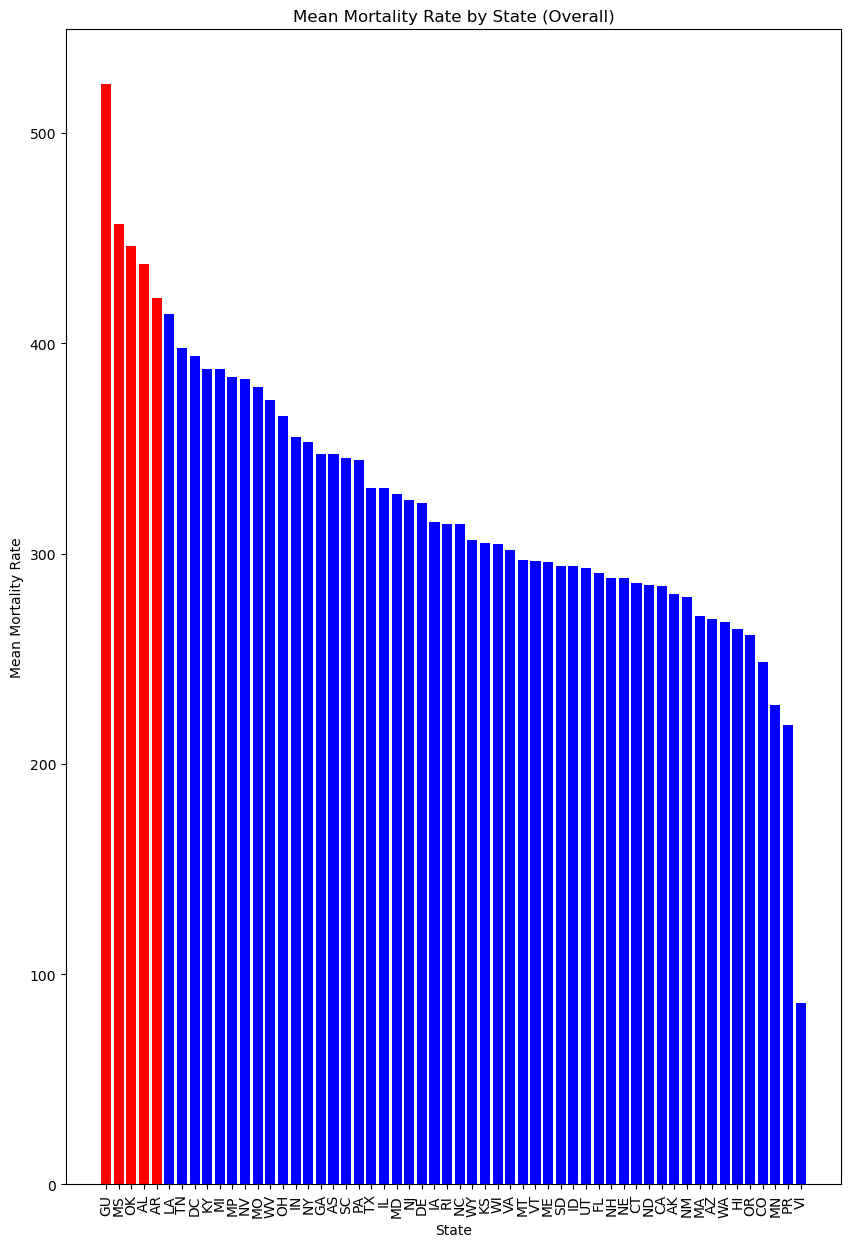

In [112]:
# Sort data
state_data_sorted = state_data.sort_values('Data_Value', ascending=False)

# Define colors
colors = ['red' if i < 5 else 'blue' for i in range(len(state_data_sorted))]

# Plot
plt.figure(figsize=(10,15))
plt.bar(state_data_sorted['LocationAbbr'], state_data_sorted['Data_Value'], color=colors)
plt.ylabel('Mean Mortality Rate')
plt.xlabel('State')
plt.title('Mean Mortality Rate by State (Overall)')
plt.xticks(rotation=90)
plt.show()


In [119]:
%%ai gpt4 -f code 
calculate the mortality rate for GeographicLevel == State and Stratification1 == male and female in dataframe {df} in {In[92]} use a bar graph without seaborn

In [123]:
%%ai gpt4 -f code 
make male blue and female red

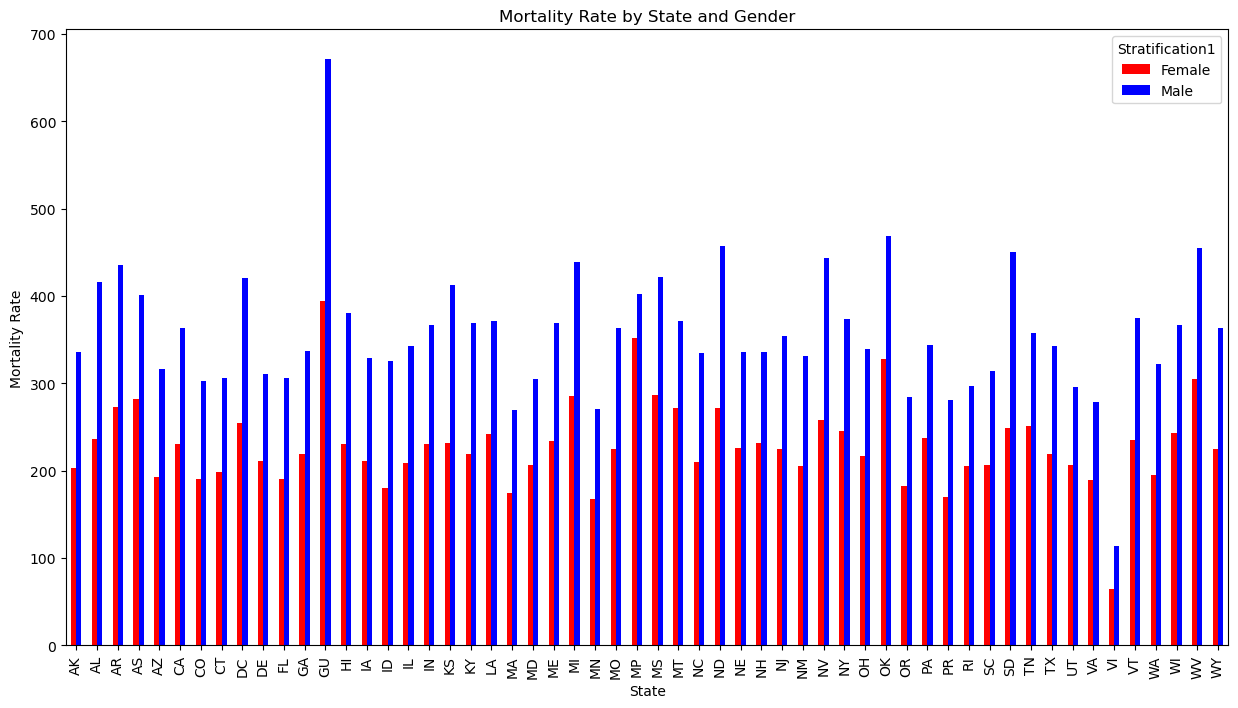

In [124]:
# Plot
state_gender_mortality.plot(kind='bar', figsize=(15,8), color=['red', 'blue'])
plt.ylabel('Mortality Rate')
plt.xlabel('State')
plt.title('Mortality Rate by State and Gender')
plt.xticks(rotation=90)
plt.show()

In graph 1 it can be concluded that people of Guam tend to have a higher rate of heart disease. It can also be seen that in general southern states have higher chances of getting heart disease compared to other states. This could be to the cultural factors of diet and obesity within these regions.

In graph 2 it can be concluded that across the board men have a significant higher chance of getting heart disease over women. It seems that the state that they live in doesnt have much of an effect on this statistic. Men tend to have higher rates of heart disease due to different hormones and more risky behavior.  

In [125]:
cur.close()
conn.close()